# CODATA Challange - Jet particles

We first import the tidyverse library:


In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We import the data:

In [2]:
df <- read.csv('./event-0005.csv')

We assess the scattering 

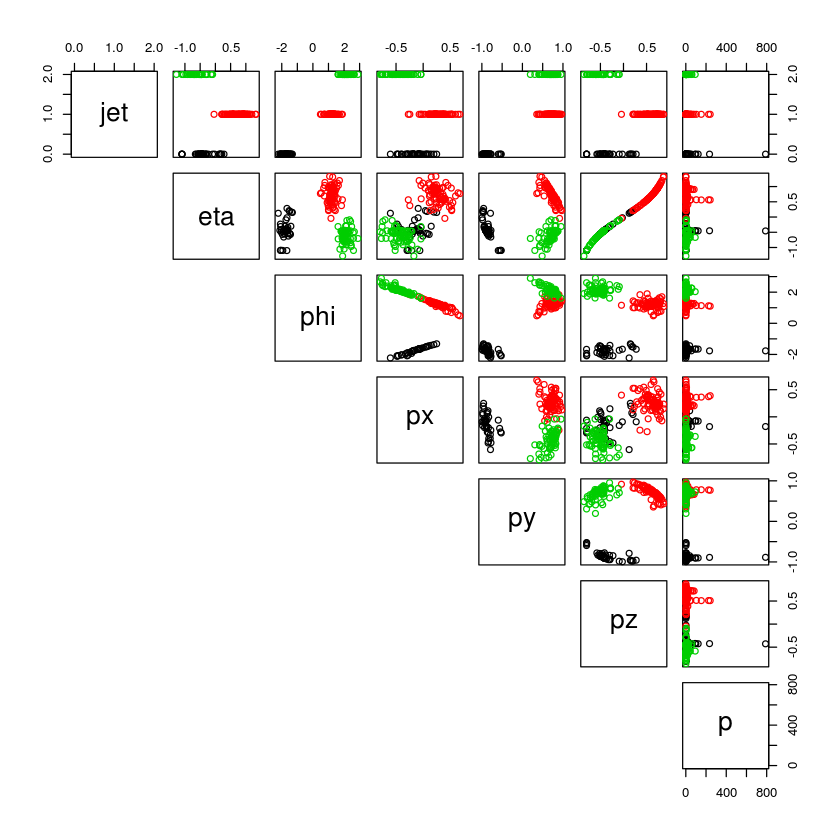

In [3]:
pairs(df[c(1,3:8)], col=df$jet+1, lower.panel = NULL)

In [4]:
summary(model)

ERROR: Error in summary(model): object 'model' not found


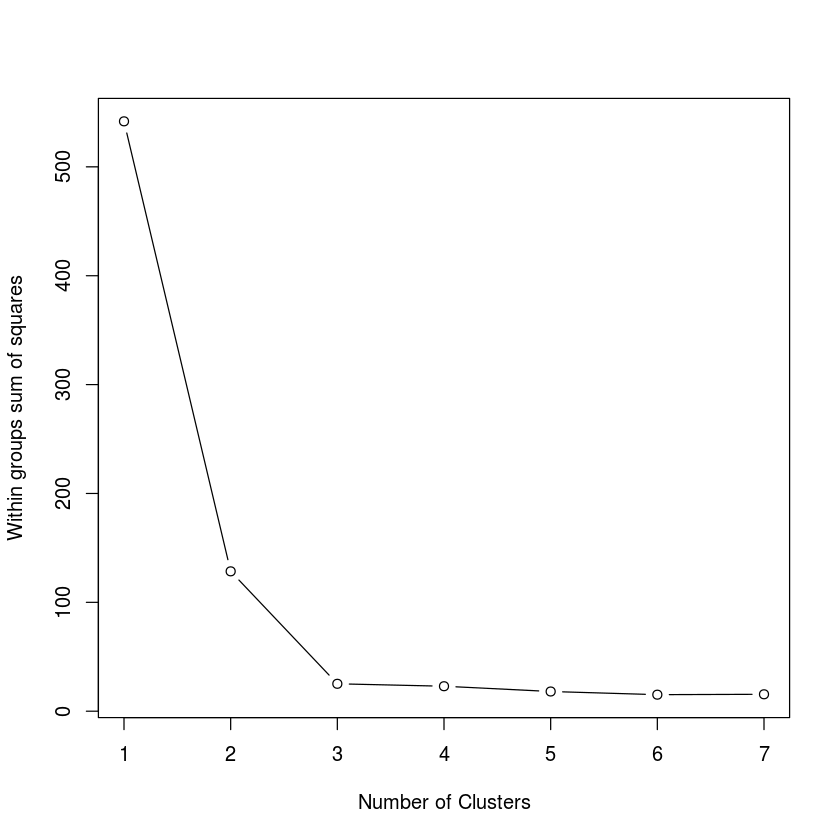

In [188]:
mydata <- df[c(3,4)]
range <- seq(1:7)
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
  for (i in range) wss[i] <- sum(kmeans(mydata,
                                       centers=i)$withinss)
plot(range, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")

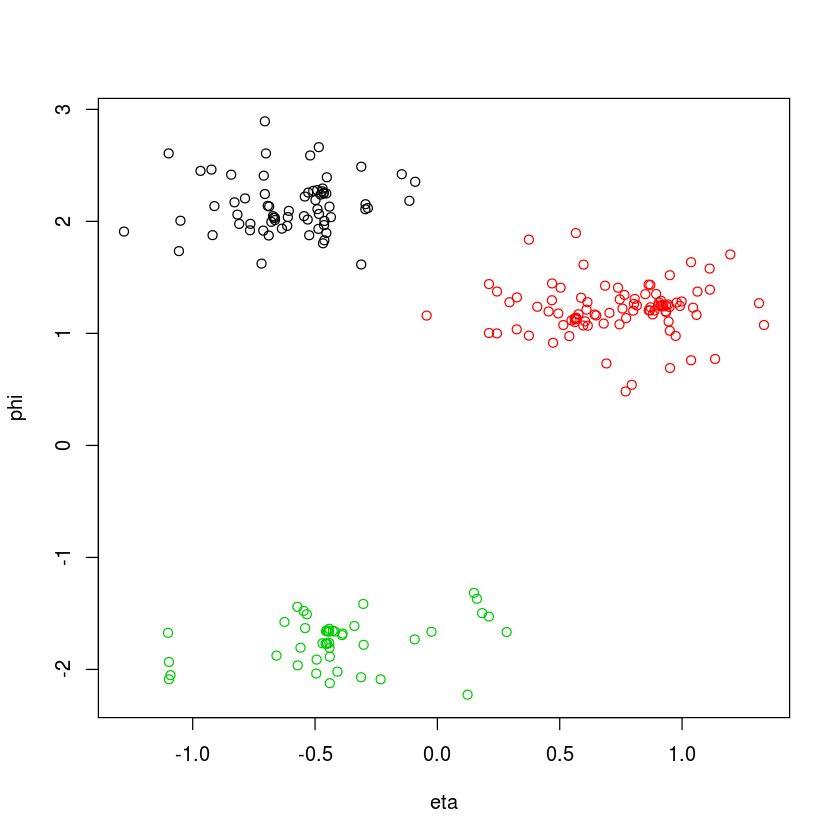

In [7]:
model <- kmeans(df[c(3,4)], centers = 3,  iter.max = 10)
plot(df[c(3,4)], col=model$cluster)

In [16]:
sum(kmeans(df[c(3,4)], centers = 1,  iter.max = 10)$withinss)

[1] 541.815

In [35]:
df$jet

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [48]:
library(e1071)

In [37]:
dim(df)

[1] 205   9

Here we divide the data into training and test set sampling the data randomly:

In [171]:
s = sample(205,205-41)
Xtrain <- df[s, names(df)[c(1,3:8)]]
Xtest <- df[-s, names(df)[c(1,3:8)]]

Plotting the complete dataset, we can see assess the class ratio among the three different types of particles using a bar plot:

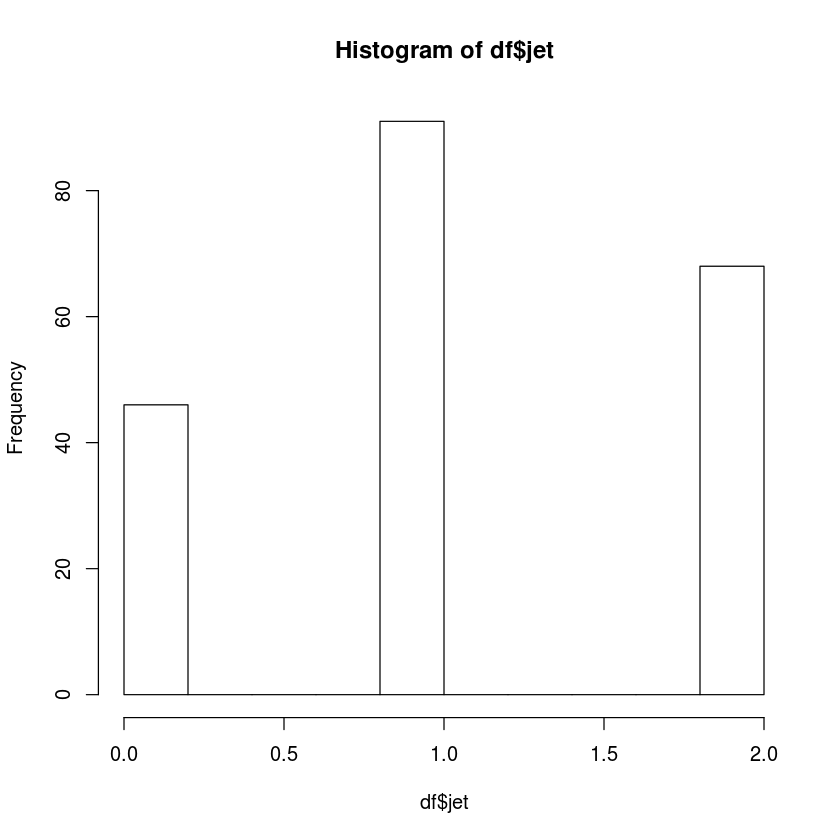

In [173]:
hist(df$jet)

Bellow we verify that this ratio is preserved when we sample the data:

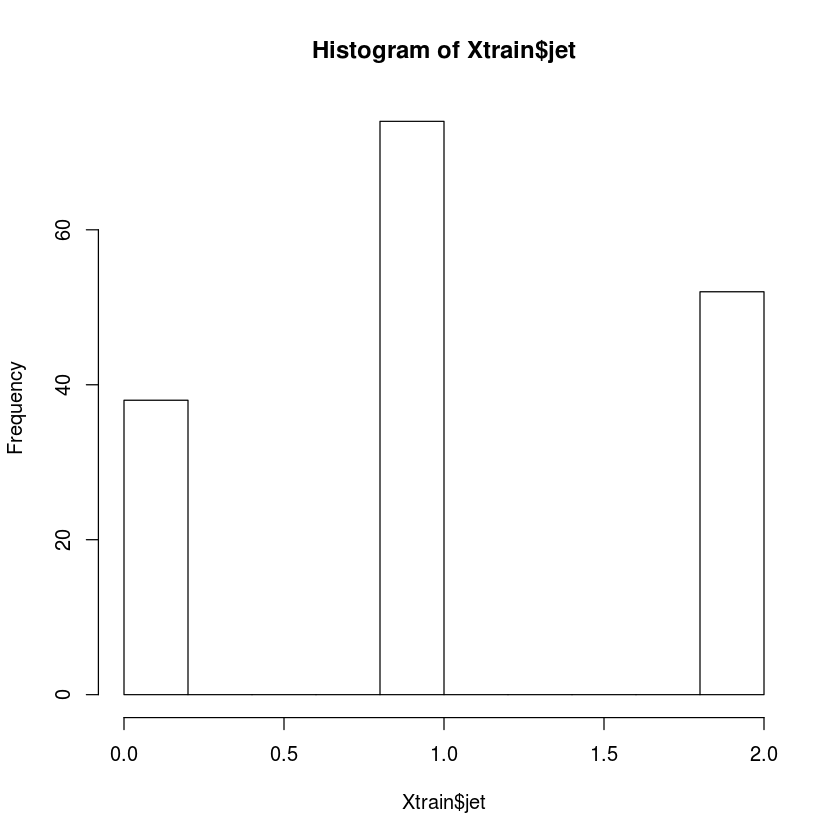

In [174]:
hist(Xtrain$jet)

In [ ]:
Xtrain <- Xtrain[,names(df)[c(1,3,4)]]

In [124]:
Xtrain$jet <- factor(Xtrain$jet)

In [126]:
svmfit <- svm(jet ~ ., data = Xtrain, kernel = "linear")

In [131]:
Xtest <- Xtest[,names(df)[c(1,3,4)]]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: var sse
        ^


In [153]:
as.numeric(predict(svmfit,Xtest[2:3]))-1 == Xtest$jet

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [ ]:
con

In [150]:
Xtest$jet

[1] 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2

In [152]:
as.numeric(predict(svmfit,Xtest[2:3])) -1

[1] 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2

In [146]:
typeof(as.integer(predict(svmfit,Xtest[2:3])))

[1] "integer"

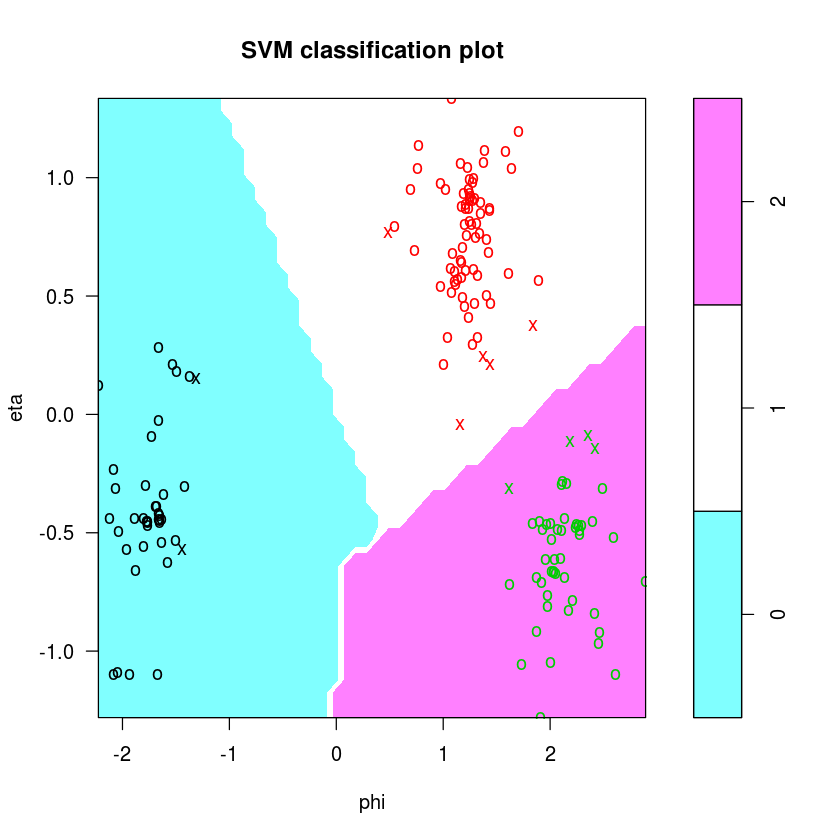

In [127]:
plot(svmfit, Xtrain[, 1:3])

In [ ]:
predict()

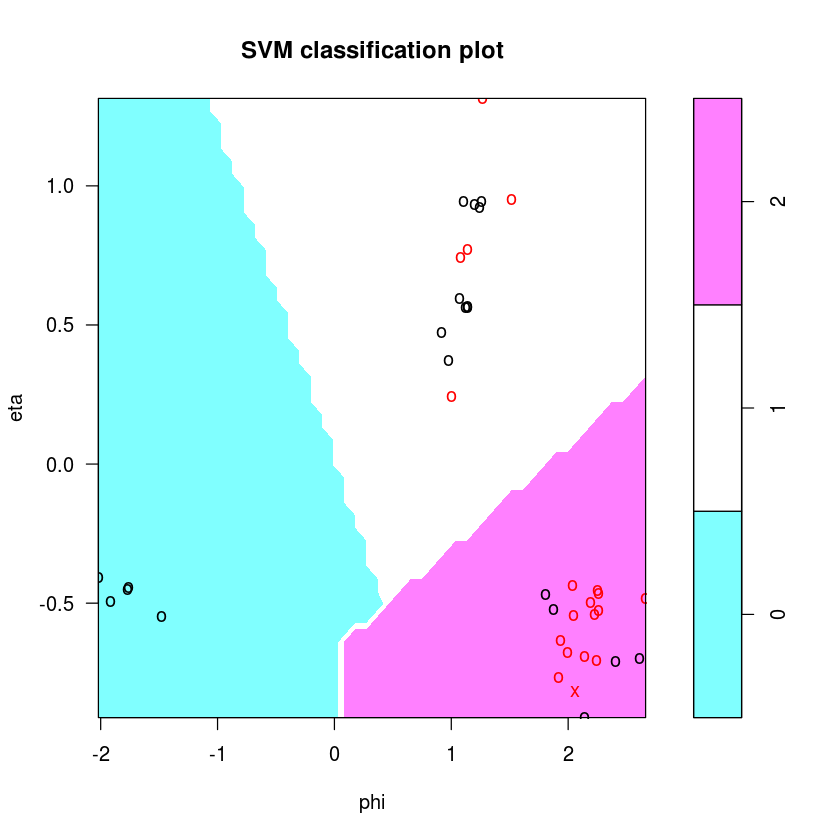

In [129]:
plot(svmfit, Xtest[, 1:3])

In [118]:
summary(svmfit)


Call:
svm(formula = jet ~ ., data = Xtrain, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1666667 

Number of Support Vectors:  9

 ( 2 4 3 )


Number of Classes:  3 

Levels: 
 0 1 2




In [111]:
 Xtrain[,names(Xtrain)[1:]]

ERROR: Error in `[.data.frame`(Xtrain, , names(Xtrain)[1:8]): undefined columns selected


In [91]:
summary(svmfit)


Call:
svm(formula = jet ~ phi + eta, data = Xtrain, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  11

 ( 2 4 5 )


Number of Classes:  3 

Levels: 
 0 1 2




In [157]:
table(predict(svmfit,Xtest[2:3]), Xtest$jet)

   
     0  1  2
  0  6  0  0
  1  0 16  0
  2  0  0 19